# The Midwest underwater

A look at 2019 floods in South Dakota, USA

Elsa Culler  
Nate Quarderer  
2025-05-20

## Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace.

In [1]:
%store -r

# Import libraries

## STEP 3: Visualize the flood

Visualizing the data will help make sure that everything is formatted
correctly and makes sense. It also helps later on with communicating
your results.

### Can we see the flood in the streamflow data?

Let’s take a look at the data from February - September, 2019. This
should let us see the peak streamflow values and when they occurred.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Below, you will see an example of how to subset your streamflow data
by date.We do this using the <code>.loc</code> attribute of your
<code>DataFrame</code>, which is a powerful tool for selecting the rows
you want. Because the dates are in the Python <code>datetime64</code>
format, you can select based on the year and month, without needing to
type out dates or times!</p>
<ol type="1">
<li>Replace <code>dataframe_name</code> with your streamflow
<code>DataFrame</code> name.</li>
<li>Save the result to a descriptive variable name, and call it at the
end of the cell for testing.</li>
</ol></div></div>

You can find some [examples of subsetting time series data in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/).

In [2]:
# Import libraries
import earthpy
import geopandas as gpd #vector data
import hvplot.pandas #Interactive plots
import pandas as pd

id = 'stars'
site_name = 'Cheyenne River near Wasta'
year = 2019
project_title = 'Cheyenne River Flood Frequency'
project_dirname = 'flood-cheyenne'

# Create project directory
project = earthpy.Project(title=project_title, dirname='project_dirname')
# Download data
streamflow_path = project.get_data()
# Display the project data directory location
project.project_dir
nwis_path = project.project_dir / 'cheyenne_streamflow_1934_2024.csv'

nwis_df = pd.read_csv(
    nwis_path,
    index_col='datetime',
    parse_dates=True)
nwis_df.info()

discharge_df = (
    nwis_df
    # Select only the discharge column as a DataFrame
    [['00060_Mean']]
    # Rename the discharge column
    .rename(columns={'00060_Mean': 'streamflow_cfs'})
)

discharge_df

flood_df = discharge_df.loc['2019-02':'2019-09']
flood_df


**Final Configuration Loaded:**
{}
Found 'data_home' in environment variables.
🔄 Fetching metadata for article 29087150...
✅ Found 1 files for download.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32866 entries, 1934-10-01 00:00:00+00:00 to 2024-09-30 00:00:00+00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_no        32866 non-null  int64  
 1   00060_Mean     32866 non-null  float64
 2   00060_Mean_cd  32866 non-null  object 
 3   00065_Mean     1592 non-null   float64
 4   00065_Mean_cd  1592 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


,streamflow_cfs
datetime,
2019-02-01 00:00:00+00:00,147.0
2019-02-02 00:00:00+00:00,192.0
2019-02-03 00:00:00+00:00,233.0
2019-02-04 00:00:00+00:00,244.0
2019-02-05 00:00:00+00:00,234.0
...,...
2019-09-26 00:00:00+00:00,419.0
2019-09-27 00:00:00+00:00,416.0
2019-09-28 00:00:00+00:00,430.0


### Create a line plot with Python

Next, plot your subsetted data. Don’t forget to label your plot!

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"></div></div>

<Axes: title={'center': 'Streamflow on the Cheyenne River During a Flood'}, xlabel='Date', ylabel='Streamflow (cfs)'>

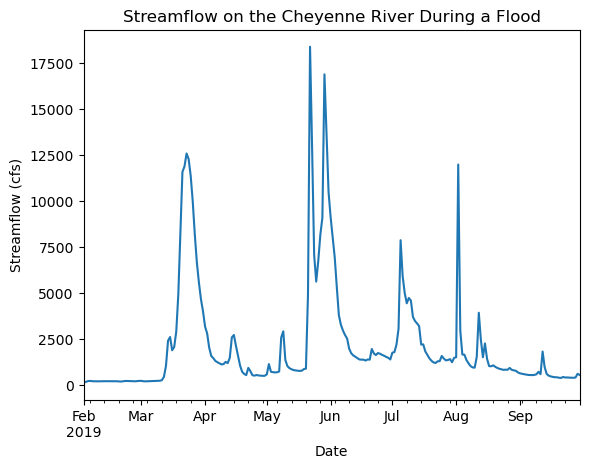

In [3]:
(
    flood_df
    .plot(
        xlabel='Date', 
        ylabel='Streamflow (cfs)',
        title='Streamflow on the Cheyenne River During a Flood',
        legend=False)
)

You should be able to see the flood in your data going up above 12000
cfs at its peak! In the next section, you’ll analyze how unusual that
is.

## Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! This code will store all your variables. You might want to
specify specific variables, especially if you have large objects in
memory that you won’t need in the future.

In [4]:
%store

Stored variables and their in-db values:


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!